# IMAGES MUST BE SQUARE IMAGES

In [114]:
import numpy as np
from classifiers import *
import cv2
from pipeline import *
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [115]:

# 1 - Load the model and its pretrained weights
classifier = Meso4()
classifier.load('weights/Meso4_DF.h5')


In [116]:
# 2 - Minimial image generator
# We did use it to read and compute the prediction by batchs on test videos
# but do as you please, the models were trained on 256x256 images in [0,1]^(n*n)

dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory(
        'test_images',
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary',
        subset='training')


Found 4 images belonging to 2 classes.


In [127]:
type(generator)

keras.src.legacy.preprocessing.image.DirectoryIterator

# REAL - 1
# DEEPFAKE - 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted : [[1.]] 
Real class : [1.]


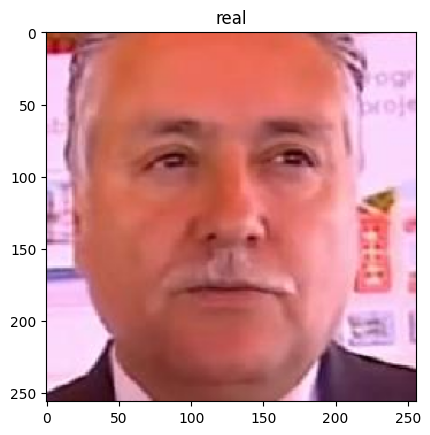

In [126]:

# 3 - Predict
X, y = next(generator)
pred = np.round(classifier.predict(X))
print('Predicted :', pred, '\nReal class :', y)
label = None 
if pred<=0.5:
    label = 'deepfake' 
else: 
    label='real'
plt.title(label)
plt.imshow(X[0])


In [118]:
# 4 - Prediction for a video dataset

classifier.load('weights/Meso4_F2F.h5')

predictions = compute_accuracy(classifier, 'test_videos')
for video_name in predictions:
    print('`{}` video class prediction :'.format(video_name), predictions[video_name][0])


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'test_videos'